In [45]:
from config import *

In [46]:
print(f'{year}年{month}月')

2020年5月


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../../py')
import db

In [48]:
conn=db.get_conn()

In [49]:
stat_data = pd.read_sql(sql='select * from MonthlyStats order by Month', con=conn)
stat_data

,Month,Salary_Mean,Salary_Median,JD_Count,HeadCount
0,201906,13387,12500,95375,306980
1,201907,13600,12500,91895,293948
2,201908,13785,12500,91631,289118
3,201909,13817,12500,87938,277901
4,201910,13730,12500,84654,269005
5,201911,13857,12500,81763,262185
6,201912,13938,12500,81142,260002
7,202001,14085,12500,74779,239779
8,202002,14525,12500,65189,204042
9,202003,14653,12500,60070,186531


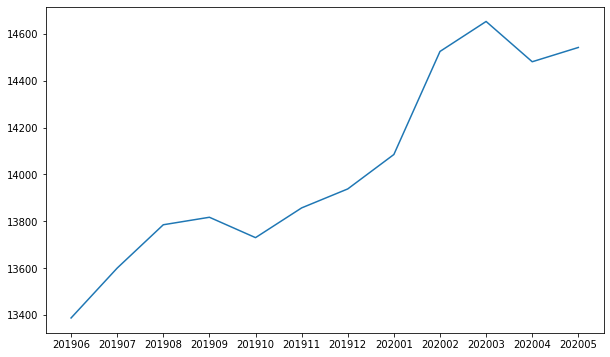

In [50]:
plt.figure(figsize=(10,6))
plt.plot("Month","Salary_Mean",data=stat_data)
plt.show()

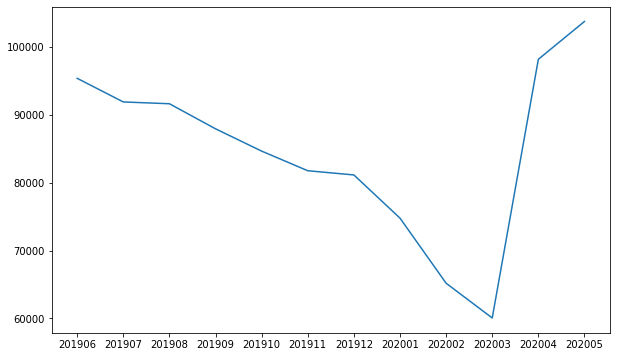

In [39]:
plt.figure(figsize=(10,6))
plt.plot("Month","JD_Count",data=stat_data)
plt.show()

[1.0]


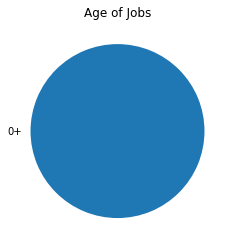

In [40]:
counts=[]
percentages=[]
count1=conn.execute(f"select COUNT(1) from _{year}{month:02}").fetchall()[0][0]
counts.append(count1)

for i in range(1,month-6+1):
    i_count=conn.execute(f"select COUNT(1) from _{year}{month:02} a inner join _{year}{month-i:02} b on a.job_id=b.job_id").fetchall()[0][0]
    counts.append(i_count)
    percentages.append((counts[i-1]-i_count)/counts[0])
    
percentages.append(counts[-1]/counts[0])
print(percentages)

labels=[]
for i in range(1,month-6+1):
    labels.append(i)
labels.append(f"{str(month-6+1)}+")

plt.pie(percentages, labels=labels)
plt.title("Age of Jobs")
plt.show()

# 按照职能统计平均工资

In [51]:
data_original=pd.read_sql(sql=f"select * from _{year}{month:02} where monthly_salary>0 and monthly_salary<80000", con=db.get_conn())

data_career=data_original.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career['salary']=data_career['salary'].astype(int)

data_career[f'2020年{month}月']=data_career['salary']
del data_career['salary']

In [52]:
data_original2019=pd.read_sql(sql=f"select * from _{year-1}{month:02} where monthly_salary>0 and monthly_salary<80000", con=db.get_conn())

data_career2019=data_original2019.groupby(by='career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean')
)

data_career2019[f'2019年{month}月']=data_career2019['salary'].astype(int)
del data_career2019['salary']

In [57]:
data_career2019.join(data_career, how='outer')

,2019年5月,2020年5月
career,,
ADAS,23771.0,18842.0
Android开发工程师,12766.0,14018.0
CAE,11870.0,14272.0
CTO,32500.0,36425.0
Cocos2d-x开发工程师,14449.0,16682.0
DSP,16412.0,14555.0
ETL,13861.0,13588.0
GIS,11646.0,12691.0
HTML5开发工程师,NaN,13599.0


In [56]:
df=data_career2019.join(data_career, how='outer')
df[f'{year-1}年{month}月']=df[f'{year-1}年{month}月'].astype(int)
df[f'{year}年{month}月']=df[f'{year}年{month}月'].astype(int)
display(df)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [54]:
for _year in [2019, 2020]:
    for _month in range(12):
        sql=f"""
        delete from [jobs].[dbo].[_{_year}{_month+1:02}] where city ='杭州' and title like '00%(职位编号：%)'
        """
        print(sql)


        delete from [jobs].[dbo].[_201901] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201902] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201903] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201904] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201905] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201906] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201907] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201908] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201909] where city ='杭州' and title like '00%(职位编号：%)'
        

        delete from [jobs].[dbo].[_201910] where city ='杭州' and title like '00%(职位编号：%)'
        

        d

In [29]:
sql

"\ndelete from [jobs].[dbo].[_202011] where province ='异地招聘'\ndelete from [jobs].[dbo].[_202011] where job_summary like '%应届生%'\ndelete from [jobs].[dbo].[_202011] where title like '%应届%'\n        "